# Example Notebook

This is an example notebook.

Modify / remove any of the below as suited for your needs

## Setup

In [1]:
# package install 
# !pip3 install flake8
# !pip3 install m2r
# !pip3 install nbformat
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install pytest
# !pip3 install pytest-cookies
# !pip3 install pytest-cov
# !pip3 install sphinx
# !pip3 install spacy
# !pip3 install nltk
# !pip3 install wordcloud


# Standard python packages
import os
import sys
import string
# # for natural language processing: named entity recognition
# import spacy
# from spacy.displacy.render import EntityRenderer
# from IPython.core.display import display, HTML

# Other package imports
import numpy as np
import pandas as pd
import nltk


# if uising a Jupyter notebook, include:

# Visualization packages
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')
print(project_root)
print(data_folder)
print(data_folder_raw)
print(src_folder)

/notebooks
/notebooks/data
/notebooks/data/raw
/notebooks/src


This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, "../src")

from neraccidente import examplemodule

## Some Processing

## Appendix 1 - Environment Configuration

In [4]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

/notebooks/ner-accidente/notebooks
3.8.2 (default, Jul 16 2020, 14:00:26) 
[GCC 9.3.0]
/usr/bin/python3
['../src', '/notebooks/ner-accidente/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']


## Appendix 2 - Automated Tests

In [5]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /notebooks
plugins: cov-2.10.1, cookies-0.5.1
collected 5 items / 3 errors / 2 selected                                      

==================================== ERRORS ====================================
____________ ERROR collecting ner-accidente/tests/test_notebook.py _____________
import file mismatch:
imported module 'test_notebook' has this __file__ attribute:
  /notebooks/ml_basic/tests/test_notebook.py
which is not the same as the test file we want to collect:
  /notebooks/ner-accidente/tests/test_notebook.py
HINT: remove __pycache__ / .pyc files and/or use a unique basename for your test file modules
_ ERROR collecting ner-accidente/tests/neraccidente/examplemodule/test_add_value_to_numpy.py _
import file mismatch:
imported module 'test_add_value_to_numpy' has this __file__ attribute:
  /notebooks/ml_basic/tests/ml_b

In [6]:
# import our dataSet for analysis
path = os.path.join('../data', 'raw', 'ner - locatia accidente.csv')
# print(path)

df = pd.read_csv(path)
# print(f"Loaded {accident_data.shape[0]} samples.")

# select the only the rows that has marked words y=1
df = df.loc[df['y'] == 1]


print(df)

      id  y                                               text  com
0      0  1  un sofer a tamponat o femeie pe trecerea pieto...  NaN
1      1  1  aseara jurul orei 2330 politia capitalei a fos...  NaN
2      6  1  accidentul s a intamplat aceasta dimineata pe ...  NaN
3      7  1  un pieton a fost spulberat mortal aseara un ta...  NaN
4     10  1  accidentul a avut loc sectorul botanica pe ||s...  NaN
..   ... ..                                                ...  ...
150  370  1  intersectia strazilor ||vadul|| ||lui|| ||voda...  NaN
151  371  1  un accident lant a avut loc aceasta dimineata ...  NaN
152  373  1  potrivt politei accidentul a avut loc acum o o...  NaN
153  375  1  accidentul s a produs astazi intersectia ||bul...  NaN
154  376  1  un barbat moarte dupa ce inima acestuia s a op...  NaN

[153 rows x 4 columns]


In [7]:
def generate_cloud(data_frame):
    all_words = ''
    for arg in data_frame:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
#         print (all_words)
    wordcloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 10).generate(all_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [8]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy
from spacy import displacy
# install romanian models
# !python3 -m spacy download ro_core_news_lg

#Plot and image tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mticker
import seaborn as sns
sns.set_style("dark")

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words

# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()
# remove all stop words that appear in the romanian text corpus


# Display the relationship between the words in phrases
# doc = nlp(df['text'][1])
# displacy.render(doc, style="dep", jupyter=True, options={'distance':140})




df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [9]:
# df["text"] = df["text"].str.replace('\xa0',' ')
# df["text"] = df["text"].str.replace('|',' ')

# df['text_no_sw'] = df['text_no_sw'].str.replace('\xa0',' ')
# df['text_no_sw'] = df['text_no_sw'].str.replace('|',' ')
# df['text_no_sw'] = df['text_no_sw'].str.replace('   ',' ')
# df['text_no_sw'] = df['text_no_sw'].str.replace('  ',' ')
# df['text_no_sw'] = df['text_no_sw'].str.replace('  ',' ')

# all_text_list = df['text_no_sw'].tolist()
# # all_text_list

# free_list = []
# for phrase in all_text_list:
# #     print(phrase)
#     free_list.append(phrase)
#     split_data = phrase.split(",")
# #     print(split_data)

# print(split_data)

In [10]:
def plot_word_freq(text_to_plot, title='Placeholder title'):
    fd2 = nltk.FreqDist(word for word in text_to_plot)      
    x=[fd2.most_common(55)[i][0] for i in range(55)]
    y=[fd2.most_common(55)[i][1] for i in range(55)]

    #palette=sns.color_palette("PuBuGn_d",100)
    palette= sns.light_palette("crimson",100,reverse=True)
    plt.figure(figsize=(65,25))
    ax= sns.barplot(x, y, alpha=0.8,palette=palette)
    plt.title(title, fontsize=110)
    plt.ylabel('Occurrences', fontsize=190)
    plt.xlabel(' Word ', fontsize=110)
    #adding the text labels
    rects = ax.patches
    labels = y
    sns.set(font_scale=3)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
        plt.xticks(rotation=90, fontsize=50)
    #plt.savefig('Toxic_Word_count1.png')    
    plt.show()


def generate_cloud(data_frame):
    all_words = ''
    for arg in data_frame:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
#         print (all_words)
    wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', min_font_size = 10).generate(all_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    

## Find all the words that exist in both lists
def get_words_that_appear_in_both(text_inpul_1,text_input_2):
    same_words = set(text_inpul_1).intersection(text_input_2)
    same_words = list(same_words)
    print(same_words)
    return same_words


def detect_entities_in_dataframe(dataframe):
    for sentence in dataframe:
        ## print named entities in phrases
        sentence_nlp = nlp(sentence)
        print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])
        # # visualize named entities
        displacy.render(sentence_nlp, style='ent', jupyter=True)

# Parse and analyse the whole text corpus

<bound method NDFrame.head of 0      un sofer a tamponat o femeie pe trecerea pieto...
1      aseara jurul orei 2330 politia capitalei a fos...
2      accidentul s a intamplat aceasta dimineata pe ...
3      un pieton a fost spulberat mortal aseara un ta...
4      accidentul a avut loc sectorul botanica pe ||s...
                             ...                        
150    intersectia strazilor ||vadul|| ||lui|| ||voda...
151    un accident lant a avut loc aceasta dimineata ...
152    potrivt politei accidentul a avut loc acum o o...
153    accidentul s a produs astazi intersectia ||bul...
154    un barbat moarte dupa ce inima acestuia s a op...
Name: text, Length: 153, dtype: object>


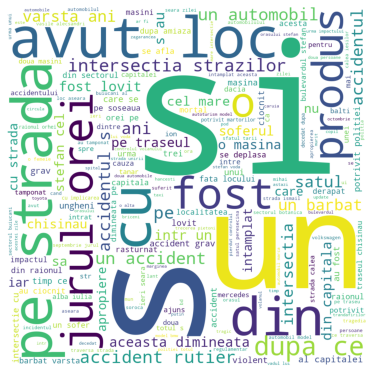

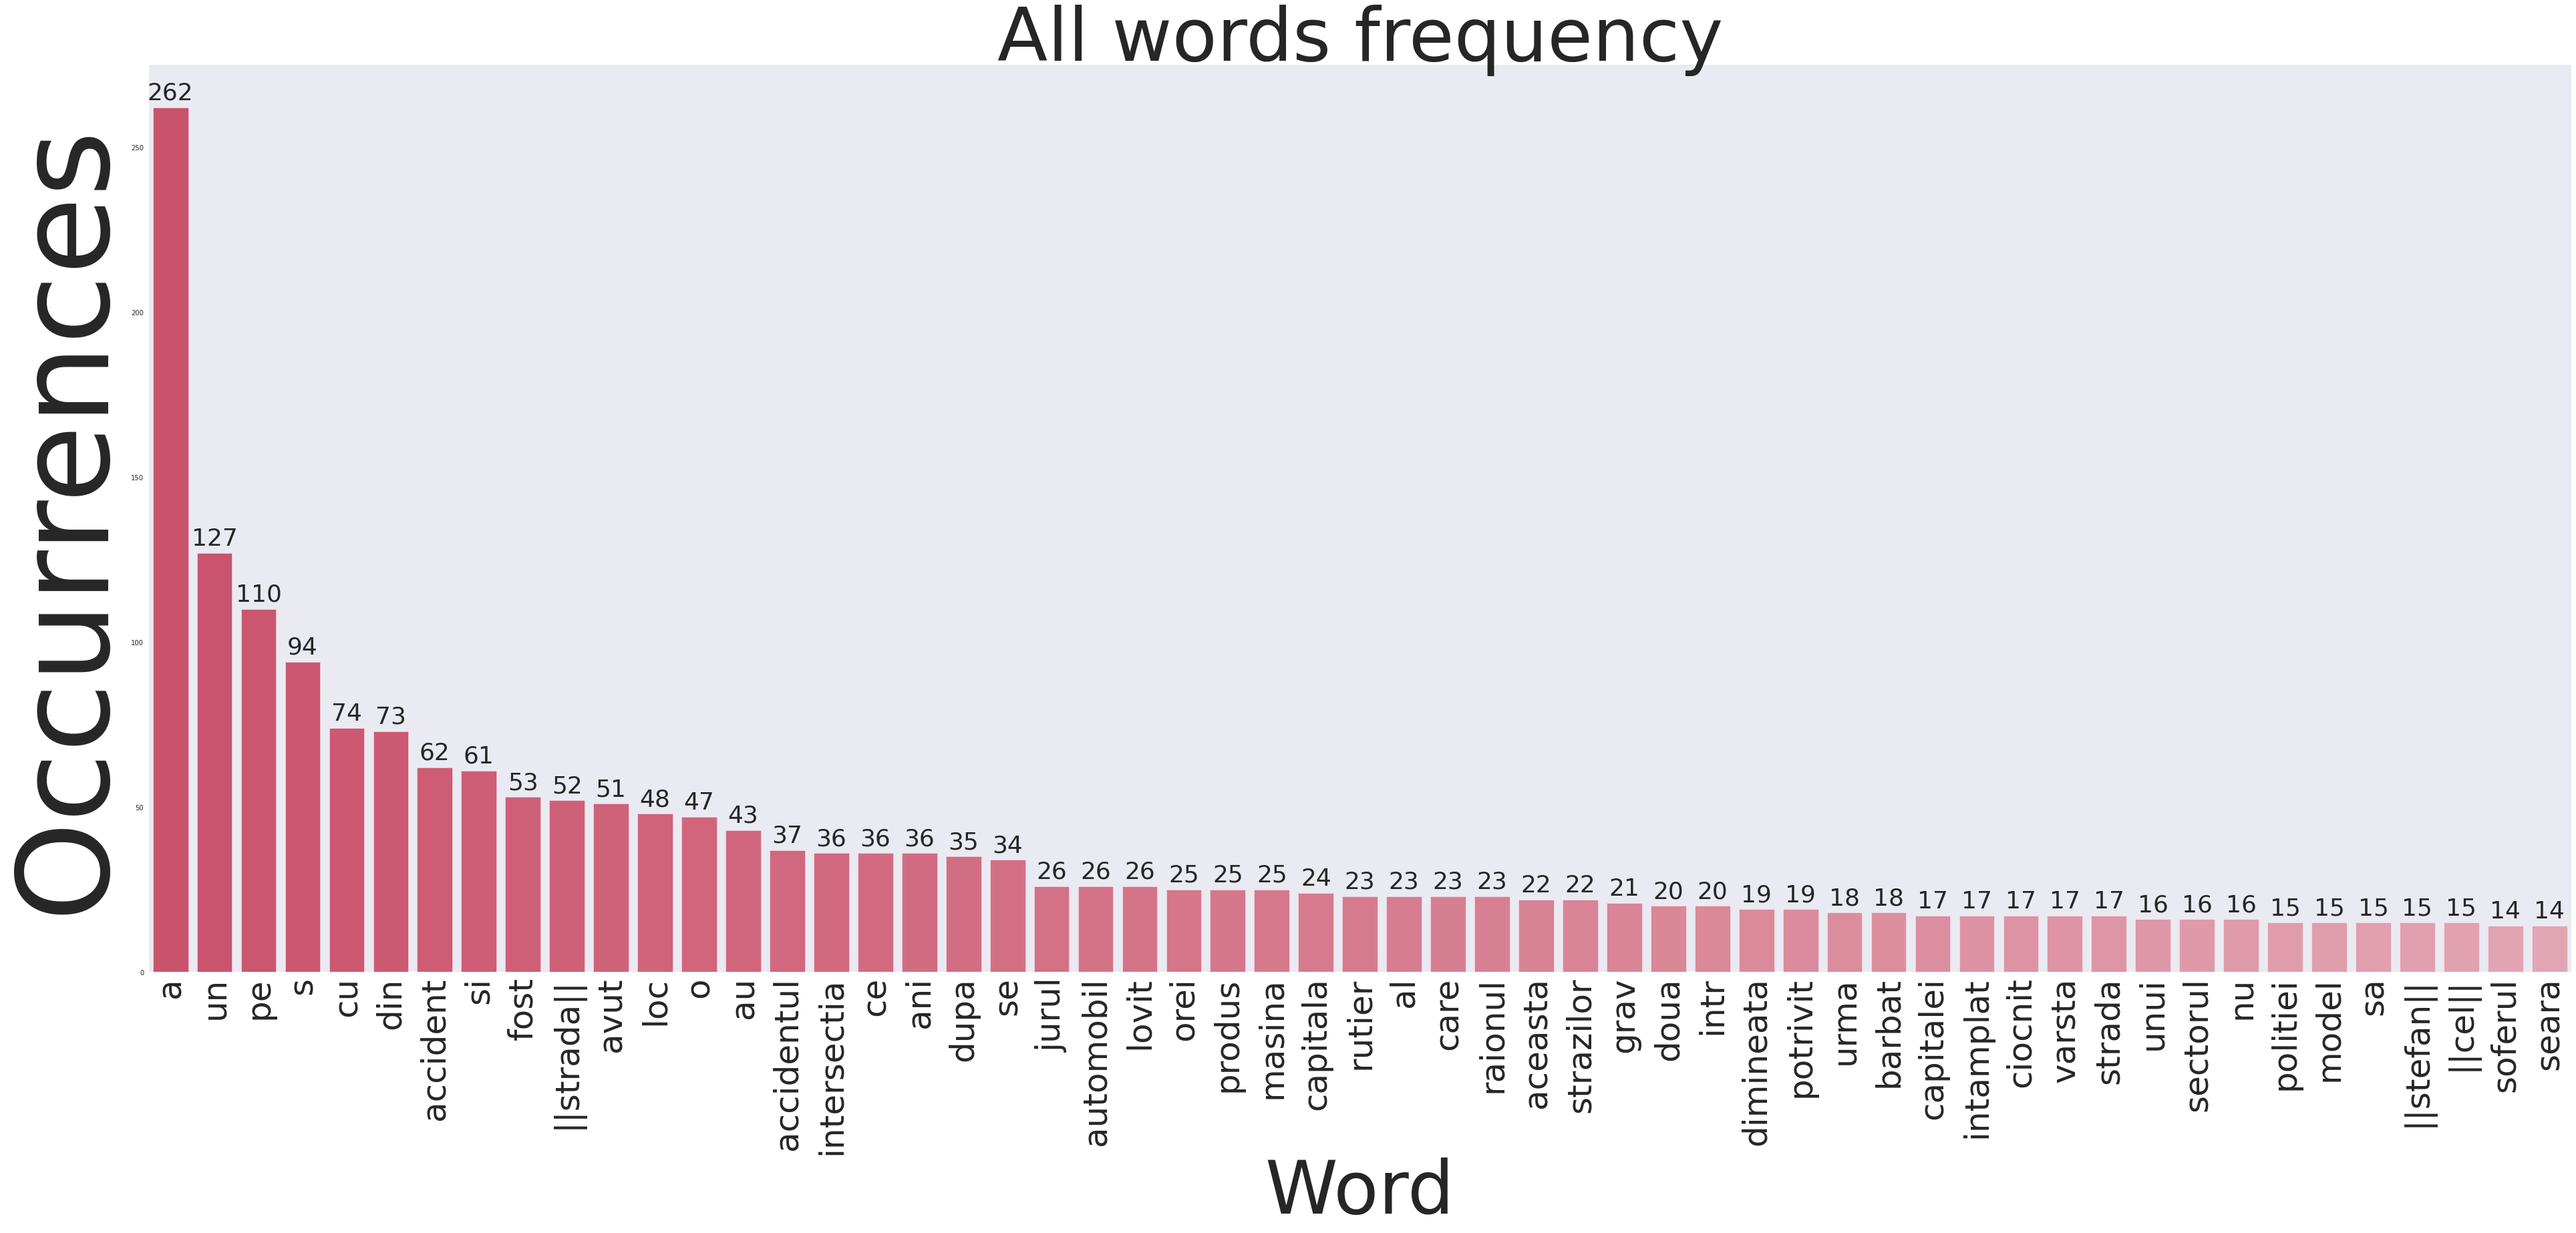

In [11]:
# df['text'] = df['text'].str.replace('\xa0',' ')
# df['text'] = df['text'].str.replace('|',' ')
# df['text'] = df['text'].str.replace('   ',' ')
# df['text'] = df['text'].str.replace('  ',' ')
# df['text'] = df['text'].str.replace('  ',' ')

print(df['text'].head)
all_corpus_text = []
for phrases in df["text"]:
    phrases = phrases.split(" ")
    for words in phrases:
        all_corpus_text.append(words)

generate_cloud(df["text"])          
plot_word_freq(all_corpus_text, title='All words frequency')

# Parse and analyse the marked words from the text-corpus

1sofer tamponat femeie trecerea pietoni intersectia ||bd decebal|| ||strada|| ||trandafirilor|| potrivit politiei persoana traumata luata ambulanta transportata urgenta spital
1aseara jurul orei 2330 politia capitalei alertata inversarea automobil ||traseul|| duce ||spre|| ||localitatea|| ||cheltuitori|| soldat decesul persoane altele traumatizate grav locului intervenit grupa ope
1accidentul intamplat dimineata ||soseaua|| ||muncesti|| capitala
1pieton spulberat mortal aseara taxi accidentul produs ||soseaua|| ||muncesti|| capitala jurul orei 21:00
1accidentul loc sectorul botanica ||strada|| ||trandafirilor|| jurul orei 20:00
1doua masini ciocnit aseara intersectia ||bulevardel||or ||dacia|| ||traian|| capitala urma impactului taxi rasturnat celalalt automobil avariat
1accident rutier intersectia strazilor ||columna|| – ||maria|| ||cebotari|| automobil model „bmw” volanul afla sofer varsta 22 ani lovit kamaz urma acestuia pasager suf
1update/foto accident intersectia ||columna|| ||ma

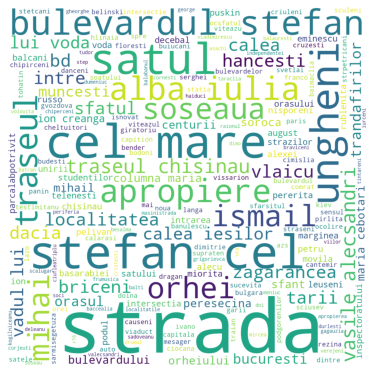

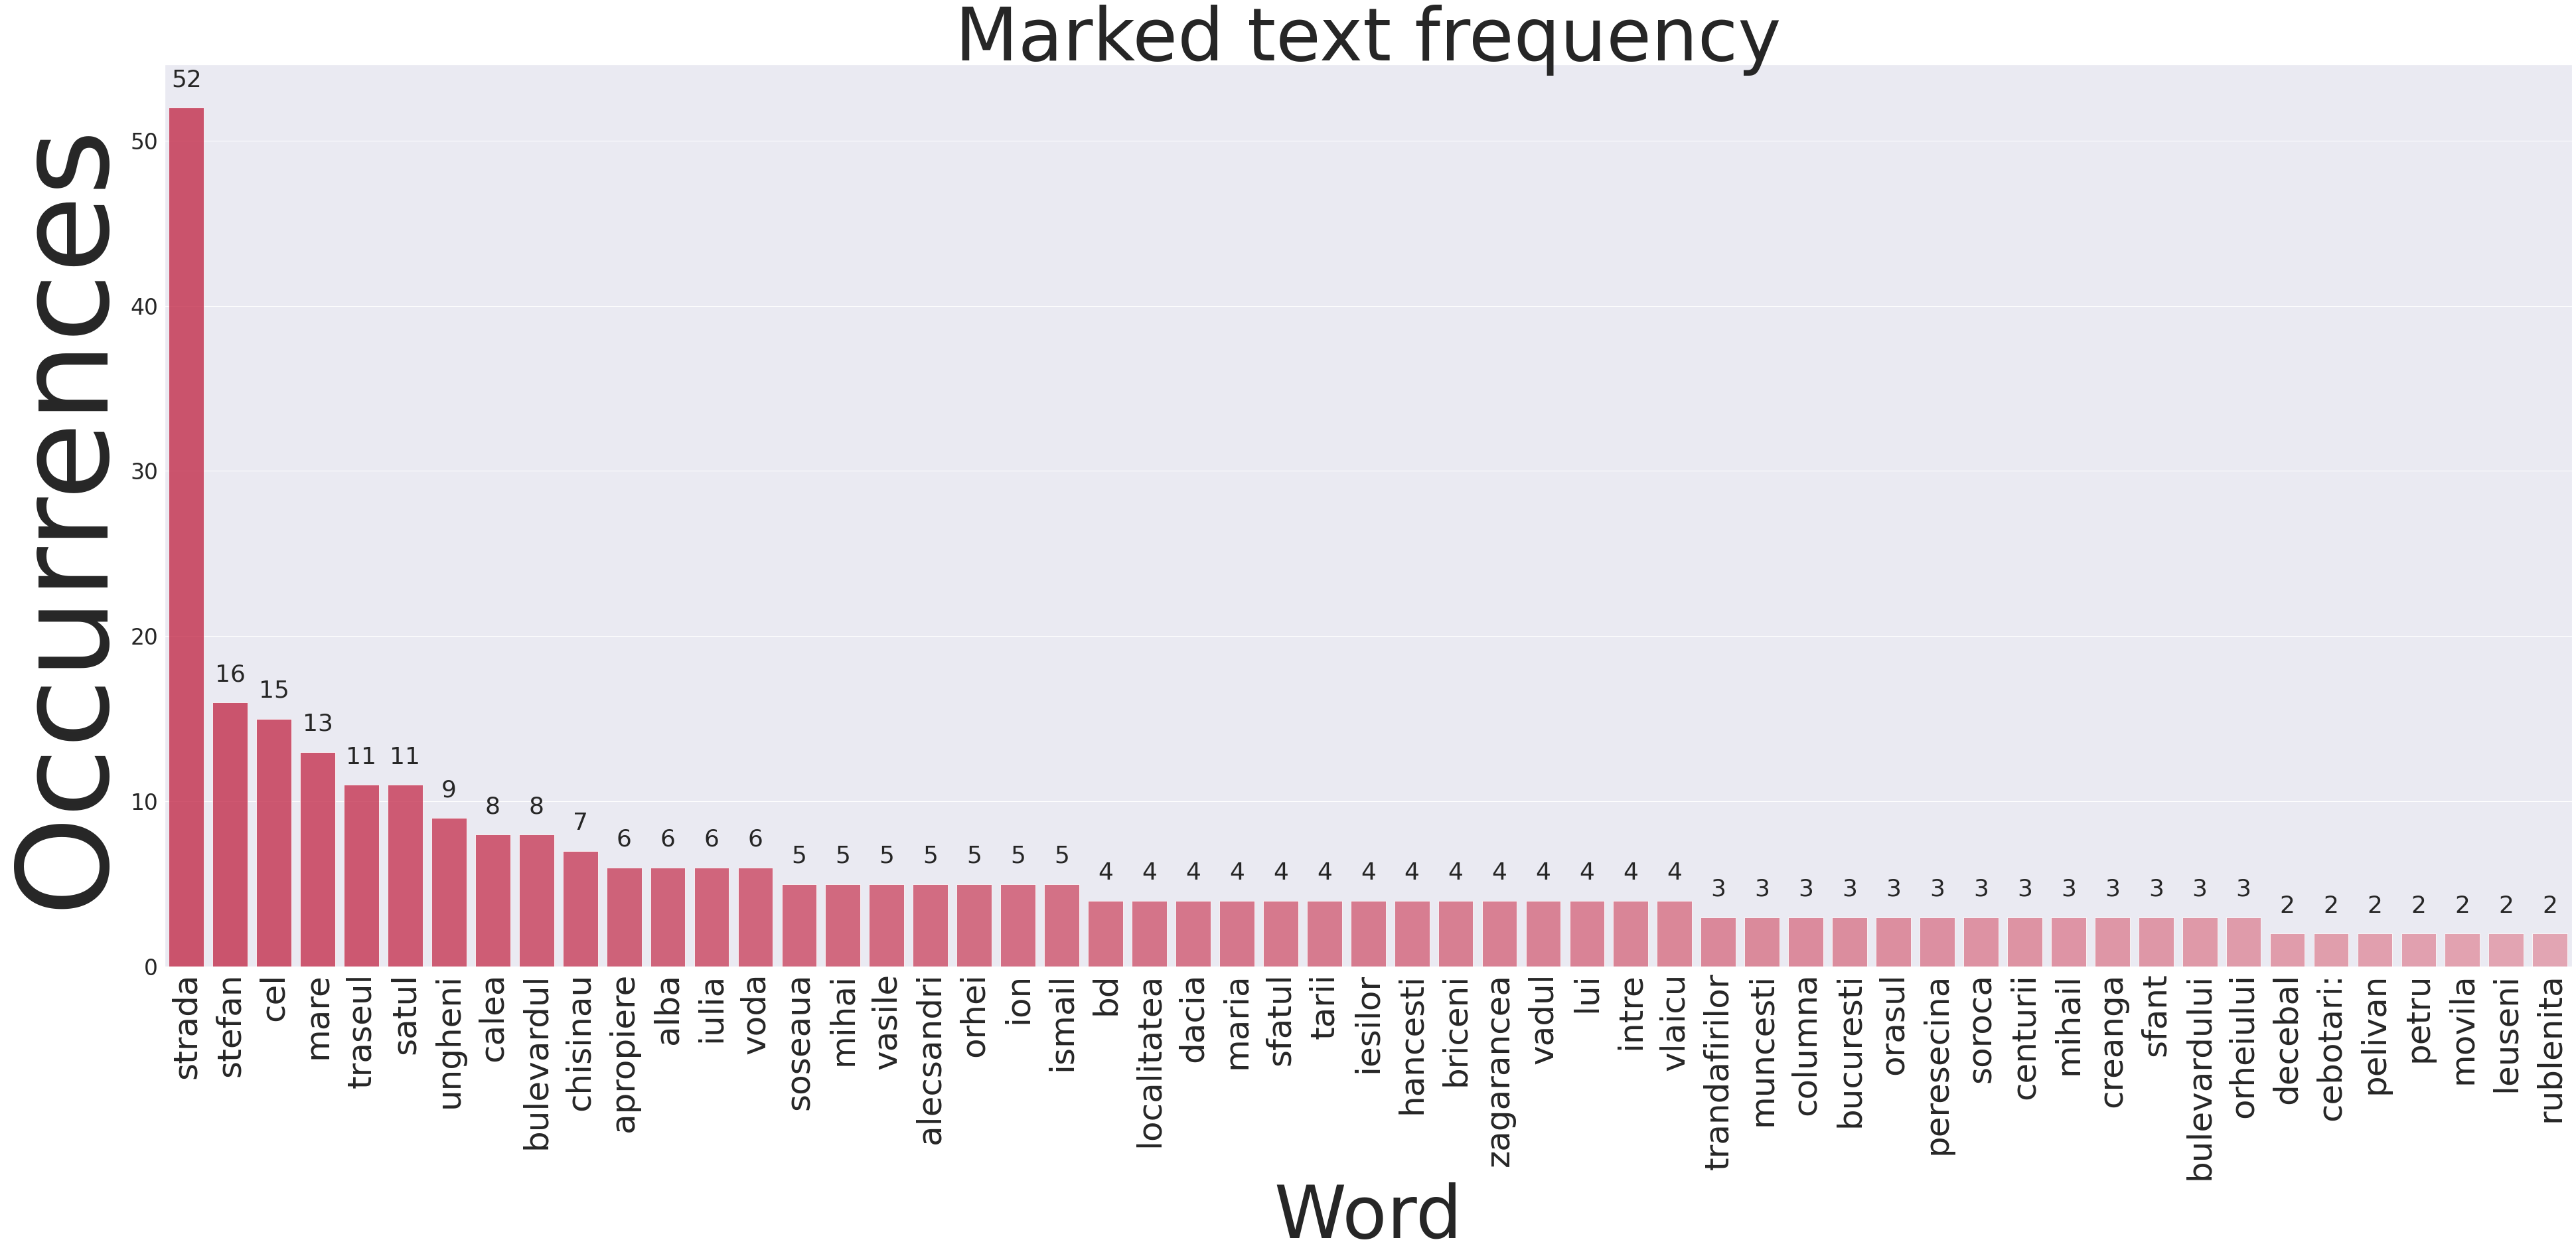

In [12]:
all_marked_text = []
all_unmarked_text = []
for phrases in df['text_no_sw']:
#     print('1' + phrases)
    phrases = phrases.split(" ")
    for words in phrases:
#         print(phrase)
        i_processed = words.replace("|","")
        if "|" in words:
            all_marked_text.append(i_processed)
        else:
            all_unmarked_text.append(words)

# Visualize text that has not been annotated    
# print(all_marked_text)
print(len(all_marked_text))
generate_cloud(all_marked_text)
plot_word_freq(all_marked_text, title='Marked text frequency')

# Parse and analyse the unmarked words from the text-corpus

2093


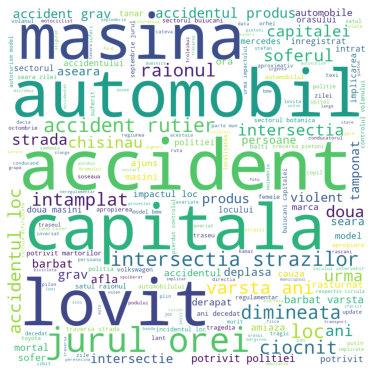

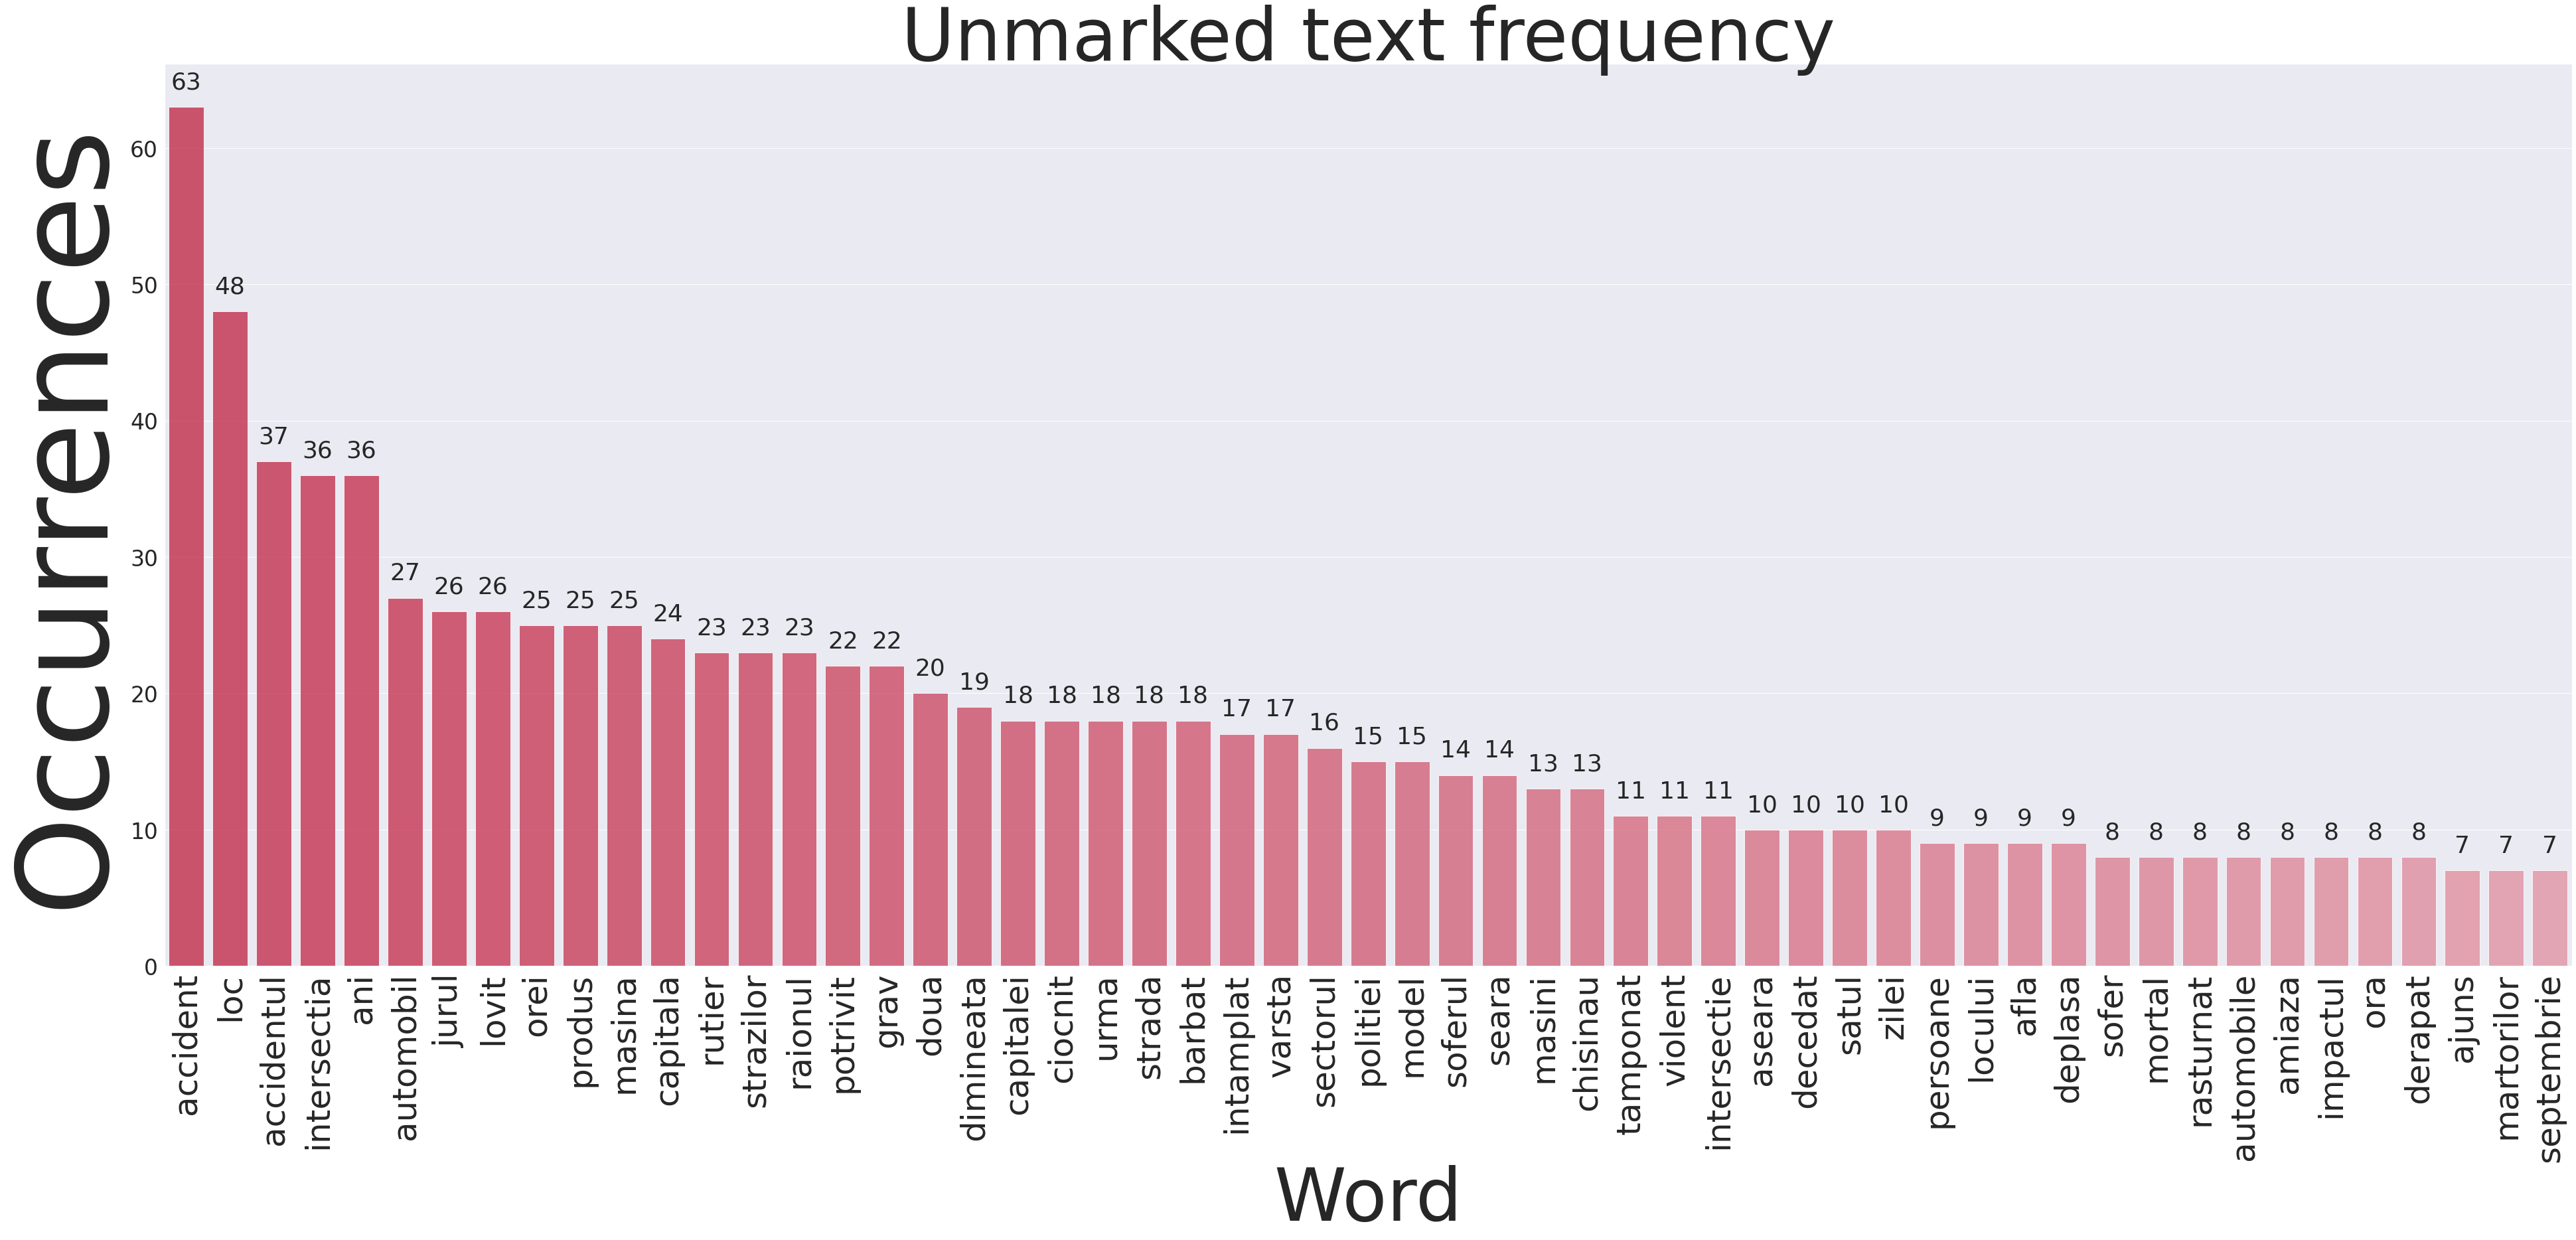

In [13]:
# Visualize text that has not been annotated
# print(all_unmarked_text)
print(len(all_unmarked_text))
generate_cloud(all_unmarked_text)
plot_word_freq(all_unmarked_text, title='Unmarked text frequency')

# Parse and analyse words from both marked and unmarked text-corspus

{'bd': 1, 'decebal': 0, 'strada': 18, 'trandafirilor': 1, 'traseul': 4, 'spre': 0, 'localitatea': 4, 'cheltuitori': 0, 'soseaua': 4, 'muncesti': 0, 'bulevardelor': 0, 'dacia': 2, 'traian': 0, 'columna': 0, 'maria': 0, 'cebotari': 0, 'cebotari:': 0, 'ivano': 0, 'franco': 0, 'bulgara': 0, 'mihai': 0, 'viteazul': 0, 'sfatul': 0, 'ocsfatul': 0, 'tarii': 1, 'stefan': 3, 'calea': 2, 'iesilor': 1, 'apropiere': 5, 'mesager': 0, 'alba': 0, 'iulia': 0, 'sucevita': 0, 'paris': 0, 'vissarion': 0, 'capition': 0, 'belinski': 1, 'pelivan': 1, '75/22': 0, 'sarmisegetuza': 0, 'bulevardul': 0, 'cel': 0, 'mare': 0, 'petru': 0, 'movila': 0, 'budesti': 0, 'cruzesti': 0, 'chisinau': 13, 'hancesti': 0, 'intersectie': 11, 'satul': 10, 'danceni': 0, 'vasile': 0, 'alecsandri': 0, 'svetlai': 0, 'comrat': 0, 'leuseni': 0, 'bucuresti': 0, 'rublenita': 0, 'noua': 0, 'alexei': 0, 'sciusev': 0, 'rezina': 0, 'chipirceni': 0, 'orasul': 2, 'bender': 1, 'langa': 2, 'gvozdova': 0, 'floresti': 0, 'ungheni': 2, 'sculeni': 0

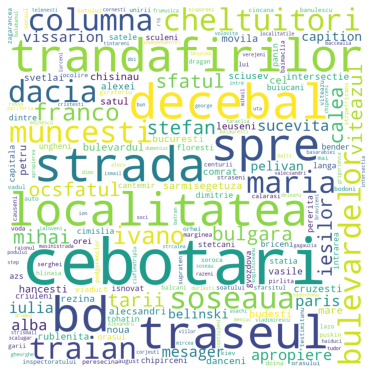

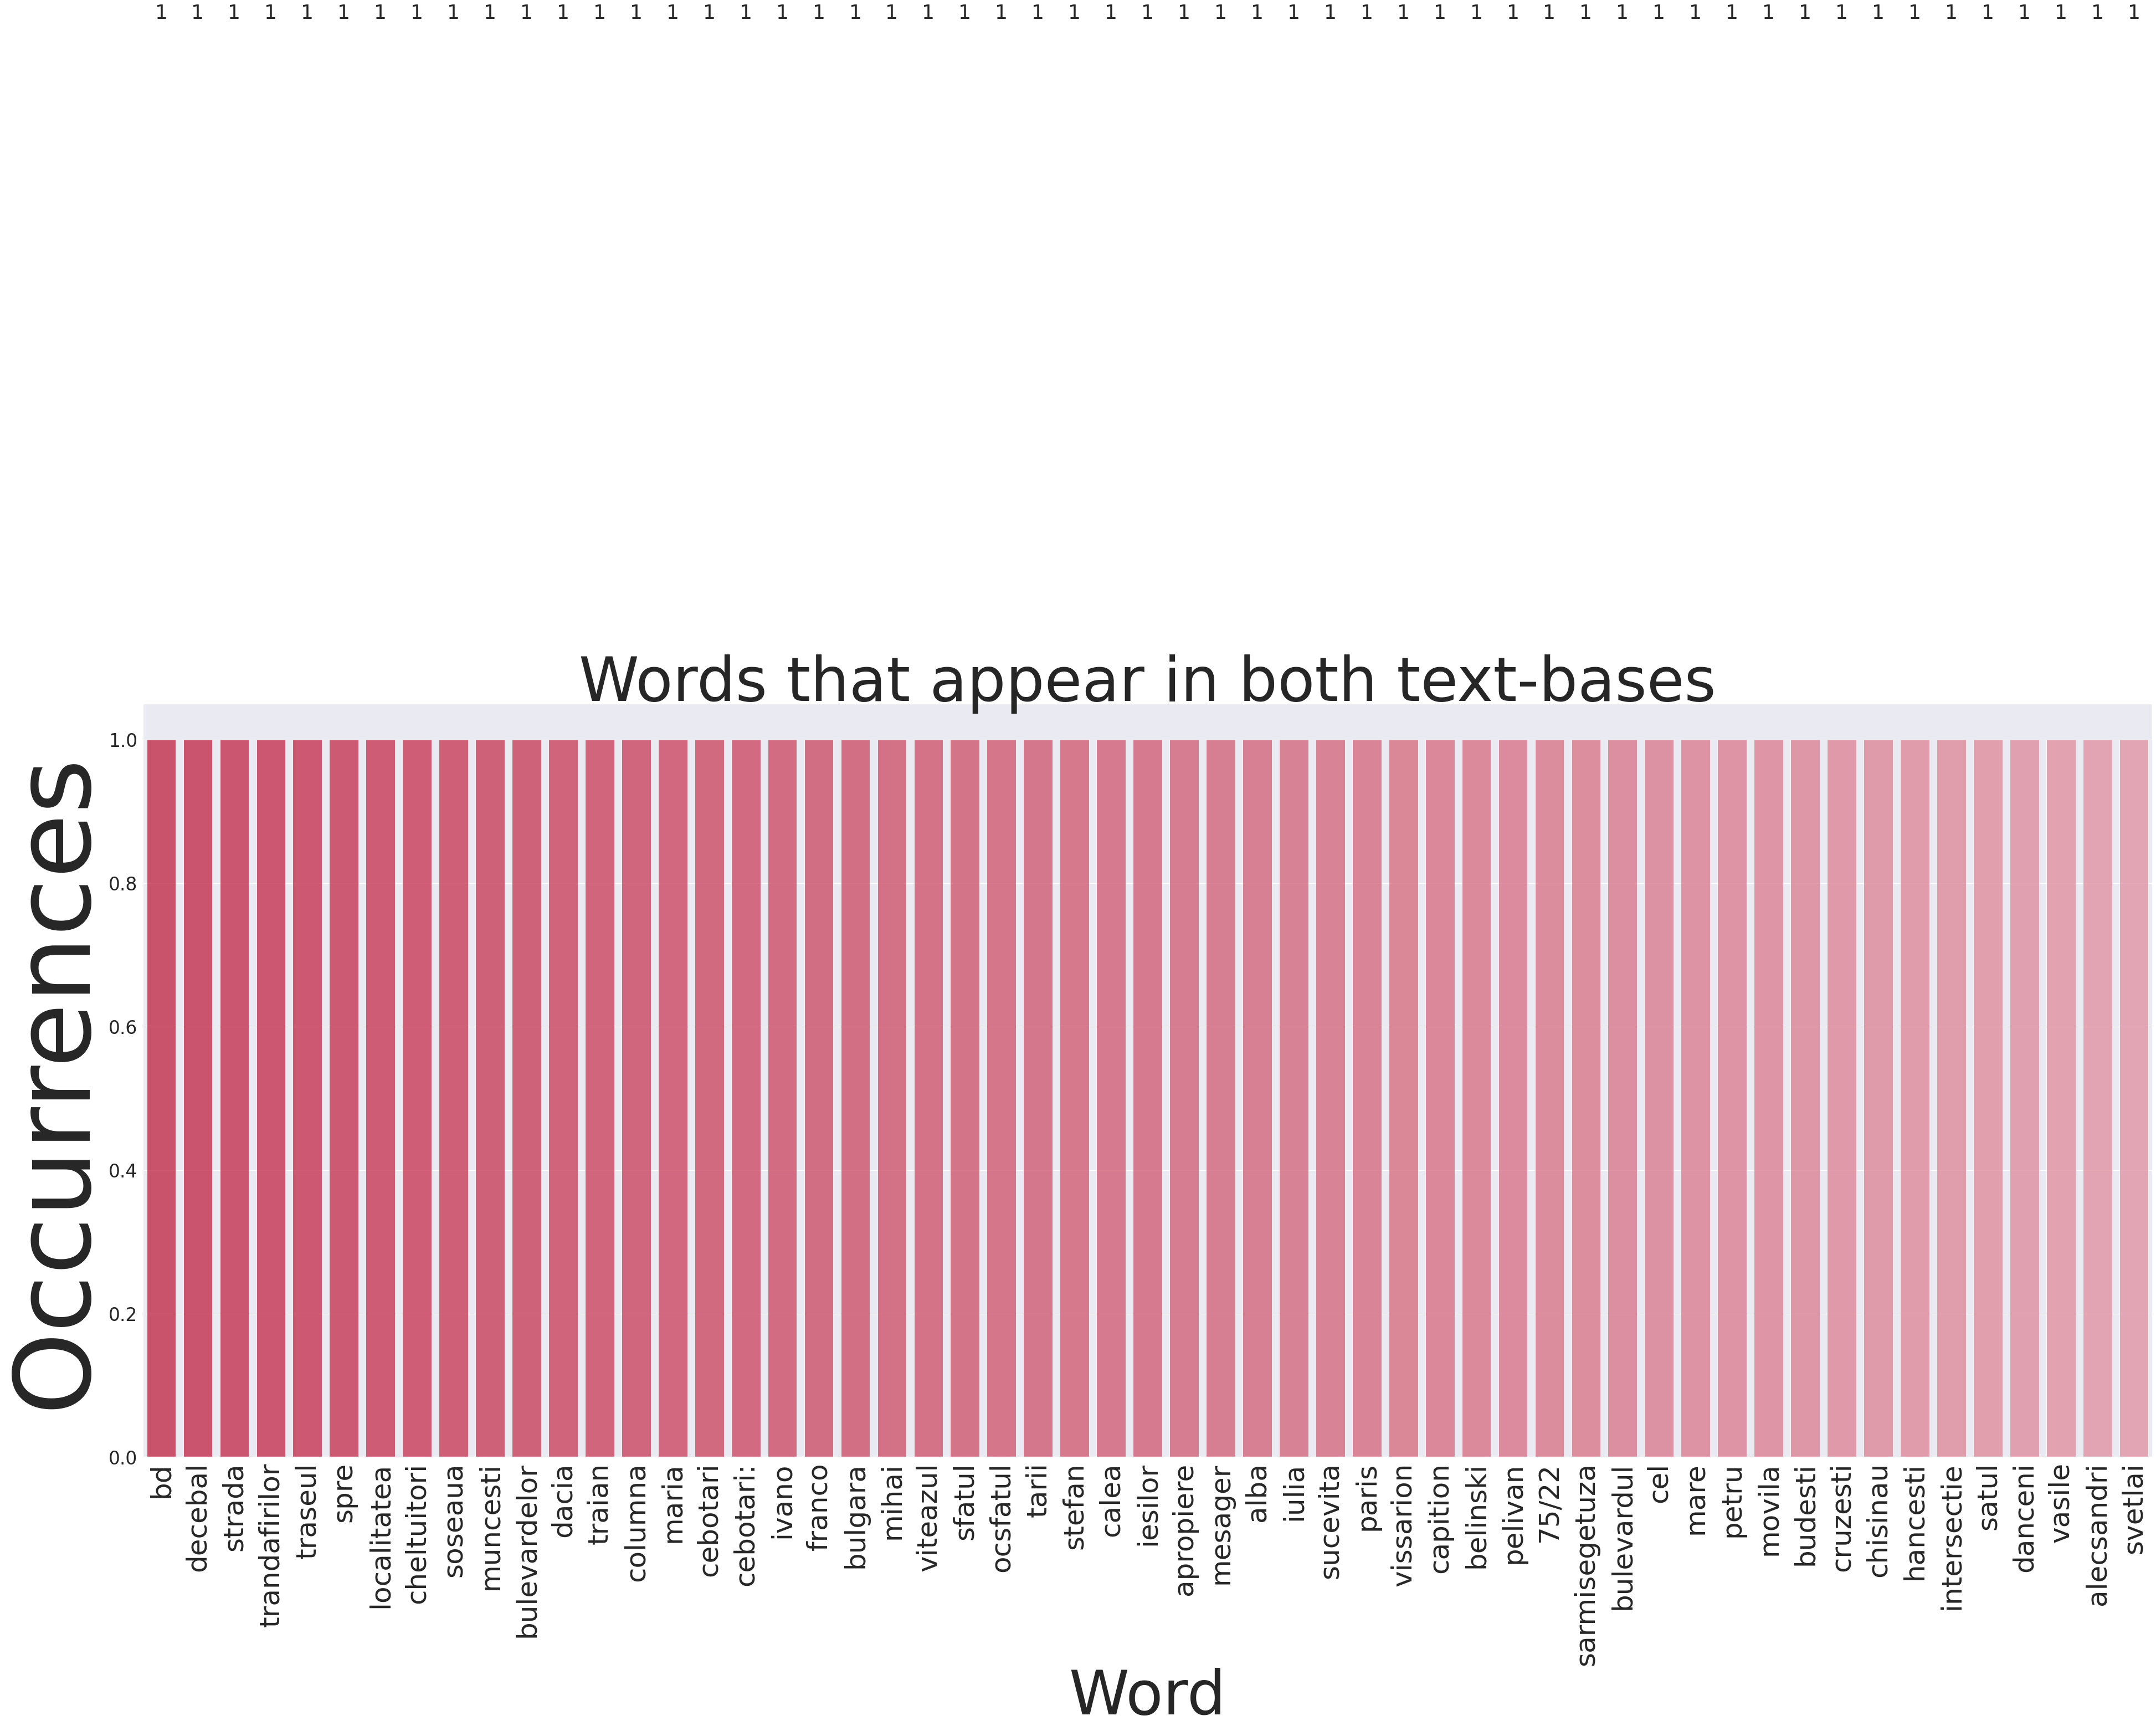

In [14]:
from collections import Counter

# count the frequency of elements of list1 in list2
def cntFrequency(lst1,lst2):
    dct=dict(Counter(lst2))
    sub_dct={k:dct.get(k,0) for k in lst1}
    return sub_dct

same_words = cntFrequency(all_marked_text,all_unmarked_text)
# print (same_words)


generate_cloud(same_words)
plot_word_freq(same_words, title='Words that appear in both text-bases')

In [15]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy
from spacy import displacy

# install romanian models
# !python3 -m spacy download ro_core_news_lg

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words


# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()
# remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [16]:
df['text_no_sw_no_bars'] = df['text_no_sw'].str.replace('|','')

sentence = df['text_no_sw_no_bars'][12]

sentence

'accident strada calea iesilor capitala apropiere intersectia strada mesager automobil model bmw ajuns stalp soferul autoturismului transportat spital'

## Iterate over all rows in "df['text_no_sw_no_bars']" and highlight the entities

In [29]:
# # TIME TO DETECT ENTITIES 
detect_entities(df['text_no_sw_no_bars'])

[(bd, 'LOC'), (decebal, 'LOC'), (strada, 'LOC'), (trandafirilor, 'LOC')]


[(aseara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (2330, 'NUMERIC_VALUE'), (alertata, 'ORGANIZATION'), (automobil, 'PRODUCT'), (cheltuitori, 'PERSON'), (persoane, 'PERSON')]


[(soseaua, 'FACILITY'), (muncesti, 'FACILITY'), (capitala, 'FACILITY')]


[(pieton, 'PERSON'), (aseara, 'NUMERIC_VALUE'), (taxi, 'PRODUCT'), (soseaua, 'FACILITY'), (muncesti, 'FACILITY'), (capitala, 'FACILITY')]


[(sectorul, 'LOC'), (botanica, 'LOC'), (strada, 'LOC'), (trandafirilor, 'LOC'), (jurul, 'LOC'), (orei, 'LOC'), (20:00, 'LOC')]


[(masini, 'PRODUCT'), (bulevardelor, 'LOC'), (dacia, 'LOC'), (traian, 'LOC'), (capitala, 'LOC'), (urma, 'LOC'), (impactului, 'LOC'), (taxi, 'LOC'), (rasturnat, 'LOC'), (celalalt, 'LOC'), (automobil, 'LOC'), (avariat, 'LOC')]


[(strazilor, 'LOC'), (columna, 'LOC'), (maria, 'PERSON'), (cebotari, 'PERSON'), (automobil, 'PERSON'), (model, 'PERSON'), („, 'PERSON'), (bmw, 'PERSON'), (”, 'PERSON'), (volanul, 'WORK_OF_ART'), (afla, 'WORK_OF_ART'), (sofer, 'WORK_OF_ART'), (22, 'DATETIME'), (ani, 'DATETIME'), (kamaz, 'GPE'), (pasager, 'PERSON')]


[(columna, 'LOC'), (maria, 'LOC'), (cebotari, 'LOC'), (automobil, 'PRODUCT'), (kamaz, 'PRODUCT')]


[(columna, 'LOC'), (maria, 'LOC'), (cebotari, 'LOC'), (automobil, 'PRODUCT')]


[(balti, 'LOC'), (intersectia, 'LOC'), (strazilor, 'LOC'), (ivano, 'LOC'), (franco, 'LOC'), (bulgara, 'LOC')]


[(strada, 'LOC'), (mihai, 'LOC'), (viteazul, 'LOC'), (capitala, 'LOC')]


[(strazilor, 'LOC'), (autovehicole, 'PRODUCT'), (martor, 'PERSON')]


[(strada, 'LOC'), (calea, 'LOC'), (iesilor, 'LOC'), (capitala, 'LOC'), (strada, 'LOC'), (automobil, 'PRODUCT'), (model, 'PRODUCT'), (bmw, 'PRODUCT'), (soferul, 'PERSON'), (autoturismului, 'PRODUCT')]


[(aseara, 'DATETIME'), (strada, 'LOC'), (calea, 'LOC'), (iesilor, 'LOC'), (sectorul, 'LOC'), (buiucani, 'LOC'), (capitalei, 'LOC'), (victimele, 'PERSON'), (automobilele, 'PRODUCT'), (soferul, 'PERSON'), (rasufla, 'PERSON')]


[(doua, 'ORDINAL'), (automobile, 'PRODUCT'), (strazii, 'LOC'), (alba, 'LOC'), (iulia, 'LOC'), (sucevita, 'LOC'), (informeaza, 'LOC'), (agora, 'FACILITY'), (potrivi, 'FACILITY'), (martorilor, 'PERSON'), (raniti, 'GPE')]


[(strazilor, 'LOC'), (alba, 'LOC'), (iulia, 'LOC'), (paris, 'LOC'), (capitala, 'LOC'), (masina, 'LOC'), (model, 'LOC'), (volvo, 'LOC'), (xc90, 'LOC'), (masina, 'PRODUCT')]


[(strada, 'LOC'), (vissarion, 'LOC'), (belinski, 'LOC'), (intersectie, 'LOC'), (strada, 'LOC'), (ion, 'LOC'), (pelivan, 'LOC'), (capition, 'LOC'), (belinski, 'LOC'), (intersectie, 'LOC'), (strada, 'LOC'), (ion, 'LOC'), (pelivan, 'LOC'), (capitala, 'LOC')]


[(masina, 'PRODUCT'), (politiei, 'PRODUCT'), (seara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (23:00, 'DATETIME'), (strada, 'LOC'), (alba, 'LOC'), (iulia, 'LOC'), (75/22, 'LOC'), (sectorul, 'LOC'), (buiucani, 'LOC'), (capitalei, 'LOC')]


[(strada, 'LOC'), (sarmisegetuza, 'LOC'), (sectorul, 'LOC'), (botanica, 'LOC'), (mercedes, 'PRODUCT')]


[(masini, 'PRODUCT'), (bulevardul, 'FACILITY'), (stefan, 'FACILITY'), (strada, 'LOC'), (petru, 'LOC'), (movila, 'LOC'), (automobil, 'LOC'), (dacia, 'LOC'), (franat, 'LOC'), (brusc, 'LOC'), (semafor, 'LOC'), (doua, 'LOC'), (masini, 'LOC'), (nerespectand, 'LOC'), (distanta, 'LOC'), (tamponat, 'LOC')]


[(masina, 'PRODUCT'), (doua, 'NUMERIC_VALUE'), (dimineata, 'DATETIME'), (traseul, 'LOC'), (budesti, 'LOC'), (cruzesti, 'LOC'), (municipiul, 'LOC'), (chisinau, 'LOC')]


[(57, 'DATETIME'), (ani, 'DATETIME'), (duminica, 'DATETIME'), (seara, 'DATETIME'), (22, 'DATETIME'), (octombrie, 'DATETIME'), (chisinau, 'ORGANIZATION'), (hancesti, 'ORGANIZATION'), (intersectie, 'ORGANIZATION'), (danceni, 'GPE'), (soferul, 'GPE')]


[(sambata, 'DATETIME'), (28, 'DATETIME'), (octombrie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (19:00, 'DATETIME'), (strada, 'LOC'), (vasile, 'LOC'), (alecsandri, 'LOC'), (cahul, 'LOC'), (soferul, 'LOC'), (autoturism, 'PRODUCT'), (model, 'PRODUCT'), („, 'PRODUCT'), (ford, 'PRODUCT'), (”, 'PRODUCT'), (55, 'DATETIME'), (ani, 'DATETIME'), (soferul, 'PERSON')]


[(ion, 'PERSON'), (focsa, 'PERSON'), (seful, 'PERSON'), (28, 'DATETIME'), (octombrie, 'DATETIME'), (svetlai, 'GPE'), (comrat, 'GPE')]


[(doua, 'NUMERIC_VALUE'), (sambata, 'DATETIME'), (30, 'DATETIME'), (septembrie, 'DATETIME'), (chisinau, 'ORGANIZATION'), (leuseni, 'ORGANIZATION')]


[(strazilor, 'LOC'), (bucuresti, 'LOC'), (automobile, 'PRODUCT'), (tamponat, 'PRODUCT')]


[(martorilor, 'PERSON'), (soferul, 'PERSON'), (automobilului, 'PRODUCT'), (automobilul, 'PRODUCT'), (mercedes, 'PRODUCT'), (benz, 'PRODUCT'), (automobil, 'PRODUCT'), (ford, 'PRODUCT')]


[(ccident, 'ORGANIZATION'), (soroca, 'ORGANIZATION'), (implicarea, 'ORGANIZATION'), (microbuz, 'ORGANIZATION'), (ruta, 'ORGANIZATION'), (biciclist, 'ORGANIZATION')]


[(alexei, 'LOC'), (sciusev, 'LOC'), (automobile, 'PRODUCT'), (proiectat, 'PRODUCT'), (pilon, 'PRODUCT')]


[(sambata, 'DATETIME'), (seara, 'DATETIME'), (23, 'DATETIME'), (septembrie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (19:55, 'DATETIME'), (calea, 'LOC'), (iesilor, 'LOC'), (municipiul, 'LOC'), (balti, 'LOC')]


[(vineri, 'DATETIME'), (22, 'DATETIME'), (septembrie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (10:15, 'DATETIME'), (chipirceni, 'GPE')]


[(zilele, 'DATETIME'), (trecute, 'DATETIME'), (podului, 'FACILITY'), (parcani, 'NAT_REL_POL'), (bender, 'GPE')]


[(automobilul, 'PRODUCT'), (amiaza, 'DATETIME'), (zilei, 'DATETIME'), (joi, 'DATETIME'), (21, 'DATETIME'), (septembrie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (14:14, 'DATETIME'), (gvozdova, 'LOC'), (raionul, 'LOC'), (floresti, 'LOC')]


[(aseara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (20:40, 'DATETIME'), (barbatul, 'PERSON'), (bicicleta, 'PRODUCT'), (mazda, 'PERSON'), (21, 'DATETIME'), (ani, 'DATETIME')]


[(luni, 'DATETIME'), (18, 'DATETIME'), (septembrie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (21:50, 'DATETIME'), (chisinau, 'ORGANIZATION'), (ungheni, 'ORGANIZATION')]


[(orasul, 'LOC'), (cimislia, 'LOC'), (dimineata, 'LOC'), (autotren, 'PRODUCT'), (automobil, 'PRODUCT'), (automobilului, 'PRODUCT'), (banda, 'PRODUCT'), (dreapt, 'PRODUCT')]


[(strada, 'LOC'), (alba, 'LOC'), (iulia, 'LOC'), (sectorul, 'LOC'), (buiucani, 'LOC'), (capitalei, 'LOC'), (imagine, 'LOC'), (microbuz, 'PRODUCT'), (mercedes, 'PRODUCT')]


[(amiaza, 'DATETIME'), (isnovat, 'ORGANIZATION'), (stetcani, 'ORGANIZATION'), (criuleni, 'GPE')]


[(18, 'DATETIME'), (ani, 'DATETIME'), (masina, 'PRODUCT'), (bulevardul, 'FACILITY'), (dimitrie, 'FACILITY'), (cantemir, 'FACILITY'), (capitala, 'FACILITY')]


[(strada, 'LOC'), (panin, 'LOC'), (orasul, 'LOC'), (bender, 'LOC'), (langa, 'LOC'), (statia, 'LOC'), (azs, 'LOC'), (51, 'LOC'), (masina, 'LOC'), (condusa, 'LOC'), (prieten, 'LOC'), (familie, 'LOC'), (tanara, 'LOC'), (24, 'LOC'), (ani, 'LOC'), (fiica, 'LOC'), (ani, 'LOC'), (soferul, 'PERSON'), (23, 'DATETIME'), (ani, 'DATETIME')]


[(masina, 'PRODUCT'), (bd, 'LOC'), (dacia, 'LOC'), (viaduct, 'LOC'), (automobilului, 'PRODUCT'), (bmw, 'PRODUCT'), (x6, 'PRODUCT'), (tanara, 'PERSON'), (22, 'DATETIME'), (ani, 'DATETIME'), (botanica, 'FACILITY'), (capit, 'FACILITY')]


[(dimineata, 'DATETIME'), (tohatin, 'GPE')]


[(64, 'DATETIME'), (ani, 'DATETIME'), (automobil, 'PRODUCT')]


[(64, 'DATETIME'), (ani, 'DATETIME'), (automobil, 'PRODUCT')]


[(45, 'DATETIME'), (ani, 'DATETIME'), (criuleni, 'GPE'), (automobil, 'PRODUCT'), (aseara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (22:00, 'DATETIME'), (peresecina, 'GPE')]


[(ofiterului, 'PERSON'), (inspectoratului, 'ORGANIZATION'), (politie, 'ORGANIZATION'), (briceni, 'ORGANIZATION'), (aliona, 'ORGANIZATION'), (bulgari, 'NAT_REL_POL'), (30, 'DATETIME'), (ani, 'DATETIME'), (automobil, 'PRODUCT')]


[(52, 'DATETIME'), (ani, 'DATETIME'), (aseara, 'DATETIME'), (pelivan, 'GPE'), (raionul, 'GPE'), (orhei, 'GPE')]


[(78, 'DATETIME'), (ani, 'DATETIME'), (peresecina, 'GPE'), (raionul, 'GPE'), (orhei, 'GPE'), (masina, 'PRODUCT'), (seara, 'DATETIME'), (peresecina, 'GPE')]


[(78, 'DATETIME'), (ani, 'DATETIME'), (peresecina, 'GPE'), (raionul, 'GPE'), (orhei, 'GPE'), (masina, 'PRODUCT'), (seara, 'DATETIME'), (peresecina, 'GPE')]


[(strada, 'LOC'), (podgorenilor, 'LOC'), (sectorul, 'LOC'), (rascani, 'LOC'), (capitalei, 'LOC'), (potrivit, 'LOC'), (volanului, 'PRODUCT'), (adormit, 'PRODUCT'), (volan, 'PRODUCT')]


[(68, 'DATETIME'), (ani, 'DATETIME'), (tractor, 'PRODUCT'), (hlinaia, 'GPE')]


[(autobuz, 'PRODUCT'), (soroca, 'FACILITY'), (ungheni, 'FACILITY'), (sase, 'NUMERIC_VALUE'), (persoane, 'PERSON'), (ora, 'DATETIME'), (1300, 'DATETIME'), (1330, 'DATETIME'), (ziua, 'DATETIME'), (vineri, 'DATETIME'), (24, 'DATETIME'), (noiembrie, 'DATETIME')]


[(giratoriu, 'FACILITY'), (strpetricani, 'FACILITY')]


[(ungheni, 'ORGANIZATION'), (camionul, 'PRODUCT')]


[(martorilor, 'PERSON')]


[(strada, 'LOC'), (kiev, 'LOC'), (3, 'LOC'), (giratoriu, 'LOC'), (alecu, 'LOC'), (russo, 'LOC'), (moscovei, 'GPE'), (traficul, 'GPE')]


[(strada, 'LOC'), (puskin, 'LOC'), (capitala, 'LOC'), (volkswagen, 'LOC'), (autocamion, 'PRODUCT'), (masini, 'PRODUCT')]


[(18, 'DATETIME'), (ani, 'DATETIME'), (masina, 'PRODUCT'), (pilon, 'PRODUCT'), (electricitate, 'PRODUCT'), (strada, 'LOC'), (doina, 'LOC'), (sectorul, 'LOC'), (rascani, 'LOC'), (capitalei, 'LOC')]


[(fetei, 'PERSON'), (serghei, 'PERSON'), (lozan, 'PERSON'), (inspector, 'PERSON'), (principal, 'PERSON'), (inspectoratului, 'ORGANIZATION'), (politie, 'ORGANIZATION'), (soatului, 'ORGANIZATION'), (politie, 'ORGANIZATION'), (soroca, 'ORGANIZATION')]


[(masina, 'PRODUCT'), (automobile, 'PRODUCT'), (conducatorul, 'PERSON')]


[(renault, 'PRODUCT'), (dacia, 'PRODUCT'), (soseaua, 'LOC'), (balcani, 'LOC')]


[(cateva, 'DATETIME'), (ore, 'DATETIME')]


[(troleibuz, 'PRODUCT'), (bulevardul, 'LOC'), (stefan, 'LOC'), (intersectie, 'LOC'), (serghei, 'LOC'), (lazo, 'LOC')]


[(seara, 'DATETIME'), (aproximativ, 'DATETIME'), (ora, 'DATETIME'), (20:25, 'DATETIME'), (bd, 'LOC'), (stefan, 'LOC'), (128, 'MONEY'), (str, 'MONEY'), (testimitanu, 'MONEY'), (mun, 'MONEY'), (balti, 'MONEY')]


[(automobil, 'PRODUCT'), (volkswagen, 'PRODUCT'), (golf, 'PRODUCT'), (seara, 'DATETIME'), (zilei, 'DATETIME'), (marti, 'DATETIME'), (ofiterului, 'PERSON')]


[(64, 'DATETIME'), (ani, 'DATETIME'), (automobil, 'PRODUCT'), (pietoni, 'PRODUCT'), (seara, 'DATETIME'), (zilei, 'DATETIME'), (calea, 'LOC'), (iesilor, 'LOC'), (capitalei, 'LOC')]


[(pod, 'FACILITY'), (ungheni, 'FACILITY'), (zagarancea, 'GPE'), (ciobanu, 'PERSON'), (ana, 'PERSON')]


[(autoturism, 'PRODUCT'), (mercedes, 'PRODUCT'), (podului, 'FACILITY'), (parte, 'FACILITY'), (centurii, 'FACILITY'), (ungheni, 'FACILITY'), (zagarancea, 'GPE'), (doua, 'NUMERIC_VALUE'), (persoane, 'PERSON')]


[(31, 'DATETIME'), (ani, 'DATETIME'), (zagarancea, 'PERSON'), (ungheni, 'ORGANIZATION'), (tanar, 'ORGANIZATION')]


[(straseni, 'GPE'), (66, 'DATETIME'), (ani, 'DATETIME'), (automobilul, 'PRODUCT')]


[(4, 'DATETIME'), (ianuarie, 'DATETIME'), (2018, 'DATETIME'), (aproximativ, 'DATETIME'), (ora, 'DATETIME'), (5:30, 'DATETIME'), (orasului, 'LOC'), (stefan, 'LOC'), (voda, 'LOC'), (barbat, 'LOC'), (varsta, 'LOC'), (46, 'LOC'), (ani, 'LOC'), (locuitor, 'LOC'), (stefan, 'PERSON'), (voda, 'PERSON'), (autovehiculul, 'PRODUCT'), (land, 'PRODUCT'), (rover, 'PRODUCT')]


[(4, 'DATETIME'), (ianuarie, 'DATETIME'), (2018, 'DATETIME'), (aproximativ, 'DATETIME'), (ora, 'DATETIME'), (5:30, 'DATETIME'), (orasului, 'LOC'), (stefan, 'LOC'), (voda, 'LOC'), (barbat, 'LOC'), (varsta, 'LOC'), (46, 'LOC'), (ani, 'LOC'), (locuitor, 'LOC'), (stefan, 'PERSON'), (voda, 'PERSON'), (autovehiculul, 'PRODUCT'), (land, 'PRODUCT'), (rover, 'PRODUCT')]


[(inspectoratului, 'ORGANIZATION'), (national, 'ORGANIZATION'), (patrulare, 'ORGANIZATION'), (accidentul, 'ORGANIZATION'), (produs, 'ORGANIZATION'), (intersectia, 'ORGANIZATION'), (strazilor, 'ORGANIZATION'), (maria, 'ORGANIZATION'), (dragan, 'ORGANIZATION'), (ciocana, 'ORGANIZATION')]


[(baimaclia, 'GPE'), (raionul, 'GPE'), (causeni, 'GPE'), (oamenilor, 'PERSON'), (legii, 'PERSON')]


[(doua, 'ORDINAL'), (automobile, 'PRODUCT'), (strada, 'LOC'), (vadul, 'LOC')]


[(masini, 'PRODUCT'), (opel, 'PRODUCT'), (toyota, 'PRODUCT'), (strazilor, 'LOC'), (banulescu, 'LOC'), (bodoni, 'LOC'), (31, 'LOC'), (august, 'LOC'), (1989, 'LOC'), (chisinau, 'LOC'), (accidentul, 'LOC'), (rutier, 'LOC'), (loc, 'LOC'), (jurul, 'LOC'), (orei, 'LOC'), (12:30, 'LOC')]


[(straseni, 'PERSON'), (copil, 'PERSON'), (strada, 'LOC'), (1, 'LOC'), (mai, 'LOC'), (strada, 'LOC'), (unirii, 'LOC'), (masini, 'PRODUCT'), (strada, 'LOC'), (unirii, 'LOC'), (orasului, 'LOC')]


[(straseni, 'PERSON'), (copil, 'PERSON'), (strada, 'LOC'), (1, 'LOC'), (strada, 'LOC'), (unirii, 'LOC'), (masini, 'PRODUCT'), (strada, 'LOC'), (unirii, 'LOC'), (orasului, 'LOC')]


[(bil, 'ORGANIZATION'), (autobuz, 'PRODUCT'), (sangerei, 'GPE'), (copaceni, 'GPE'), (soferul, 'PERSON'), (masinii, 'PERSON'), (volanului, 'PRODUCT'), (strada, 'LOC'), (independentei, 'LOC'), (orasul, 'LOC'), (sangerei, 'GPE'), (automobilului, 'PRODUCT'), (masina, 'PRODUCT')]


[(autoturism, 'PRODUCT'), (podului, 'FACILITY'), (parte, 'FACILITY'), (centurii, 'FACILITY'), (ungheni, 'FACILITY'), (zagarancea, 'GPE')]


[(strazilor, 'LOC'), (vadul, 'LOC'), (voda, 'PERSON'), (tudor, 'PERSON'), (vladimirescu, 'PERSON'), (doua, 'PERSON'), (automobile, 'PERSON'), (izbit, 'PERSON'), (frontal, 'PERSON'), (martorilor, 'PERSON'), (soferi, 'PERSON'), (alcoolului, 'PRODUCT')]


[(seara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (18:00, 'DATETIME'), (balauresti, 'GPE'), (raionul, 'GPE'), (nisporeni, 'GPE'), (autoturism, 'PRODUCT'), (model, 'PRODUCT'), („, 'PRODUCT'), (vaz, 'PRODUCT'), (62, 'DATETIME'), (ani, 'DATETIME')]


[(50, 'DATETIME'), (ani, 'DATETIME'), (automobil, 'PRODUCT'), (bicicleta, 'PRODUCT'), (tintareni, 'GPE'), (telenesti, 'GPE')]


[(20, 'NUMERIC_VALUE'), (chiperceni, 'LOC'), (raionul, 'LOC'), (orhei, 'LOC')]


[(bmw, 'PRODUCT'), (int, 'PRODUCT'), (statie, 'PRODUCT'), (statie, 'PRODUCT'), (transport, 'PRODUCT'), (strada, 'LOC'), (dimo, 'LOC')]


[(ciocana, 'PRODUCT'), (doua, 'PRODUCT'), (autoturisme, 'PRODUCT'), (model, 'PRODUCT'), (opel, 'PRODUCT'), (wolkswagen, 'PRODUCT'), (rondul, 'LOC'), (intersectia, 'LOC'), (strazilor, 'LOC'), (alecu, 'LOC'), (russo, 'LOC'), (mihai, 'LOC'), (sadoveanu, 'LOC'), (doua, 'NUMERIC_VALUE'), (persoane, 'PERSON'), (doua, 'NUMERIC_VALUE'), (masini, 'PRODUCT'), (ambulanta, 'PRODUCT')]


[(soseaua, 'LOC'), (chisinau, 'LOC'), (leuseni, 'LOC'), (dimineata, 'LOC'), (sofer, 'LOC'), (21, 'LOC'), (ani, 'LOC'), (iasi, 'LOC'), (volanului, 'PRODUCT'), (masina, 'PRODUCT')]


[(persoane, 'PERSON'), (spitalul, 'FACILITY'), (balcani, 'NAT_REL_POL'), (strada, 'LOC'), (deleanu, 'LOC')]


[(balabanul, 'GPE'), (taraclia, 'GPE')]


[(t4, 'ORGANIZATION'), (dimineata, 'DATETIME'), (zile, 'DATETIME'), (9, 'DATETIME'), (februarie, 'DATETIME'), (frumusica, 'ORGANIZATION'), (scalugar, 'ORGANIZATION'), (falesti, 'GPE')]


[(gaz, 'PRODUCT'), (lichefiat, 'PRODUCT'), (cornesti, 'GPE')]


[(troleibuz, 'PRODUCT'), (pasageri, 'PERSON'), (24, 'NUMERIC_VALUE'), (autoturism, 'PRODUCT'), (aseara, 'PRODUCT'), (rascani, 'PRODUCT'), (strada, 'LOC'), (alecu, 'LOC'), (russo, 'LOC'), (soferul, 'LOC'), (automobil, 'LOC'), (marca, 'LOC'), (toyota, 'LOC'), (incercat, 'LOC'), (depaseasca, 'LOC'), (masina, 'LOC'), (consecinta, 'LOC'), (intrat, 'LOC'), (violent, 'LOC'), (troleibuz, 'LOC')]


[(persoana, 'PERSON'), (ranita, 'PERSON'), (verejeni, 'GPE'), (telenesti, 'GPE')]


[(seara, 'DATETIME'), (zilei, 'DATETIME'), (miercuri, 'DATETIME'), (6, 'DATETIME'), (septembrie, 'DATETIME'), (strazilor, 'LOC'), (ion, 'LOC'), (dumeniuc, 'LOC'), (bd, 'LOC'), (mircea, 'LOC'), (cel, 'LOC'), (batran, 'LOC'), (masina, 'PRODUCT')]


[(automobil, 'PRODUCT'), (volvo, 'PRODUCT'), (seara, 'DATETIME'), (orasului, 'LOC'), (orhei, 'LOC')]


[(suspectul, 'PERSON'), (copil, 'PERSON'), (7, 'DATETIME'), (ani, 'DATETIME'), (corjeuti, 'GPE')]


[(28, 'DATETIME'), (feb, 'DATETIME'), (sputnik, 'PRODUCT'), (seara, 'DATETIME'), (zilei, 'DATETIME'), (ora, 'DATETIME'), (1831, 'DATETIME'), (braviceni, 'NAT_REL_POL')]


[(duminica, 'DATETIME'), (4, 'DATETIME'), (martie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (12:40, 'DATETIME')]


[(55, 'DATETIME'), (ani, 'DATETIME'), (masina, 'PRODUCT'), (strada, 'LOC'), (gheorghe, 'LOC'), (asachi, 'LOC'), (capitala, 'LOC')]


[(orei, 'DATETIME'), (1600, 'DATETIME'), (strazilor, 'LOC'), (bucuresti, 'LOC'), (valecsandri, 'LOC')]


[(besalma, 'GPE'), (uta, 'GPE'), (gagauzia, 'GPE')]


[(chisinaudepasire, 'PERSON'), (contrasensmercedes, 'PERSON'), (masinistrada, 'PERSON'), (ciufleatriplu, 'PERSON'), (ghinion, 'PERSON')]


[(camion, 'PRODUCT'), (orasului, 'LOC'), (hancesti, 'LOC'), (camionul, 'PRODUCT')]


[(automobile, 'PRODUCT'), (strazilor, 'LOC'), (vasile, 'LOC'), (alecsandri, 'LOC'), (mihail, 'LOC'), (kogilniceanu, 'LOC'), (capitala, 'LOC')]


[(seara, 'DATETIME'), (zilei, 'DATETIME'), (marti, 'DATETIME'), (27, 'DATETIME'), (martie, 'DATETIME'), (grigorievca, 'GPE'), (baccealia, 'GPE')]


[(copil, 'PERSON')]


[(martorilor, 'PERSON'), (poze, 'PRODUCT'), (ziarul, 'WORK_OF_ART'), (national, 'WORK_OF_ART'), (strada, 'LOC'), (stefan, 'LOC')]


[(amiaza, 'DATETIME'), (zilei, 'DATETIME'), (joi, 'DATETIME'), (12, 'DATETIME'), (aprilie, 'DATETIME'), (localului, 'FACILITY'), („, 'FACILITY'), (doi, 'FACILITY'), (haiduci, 'FACILITY'), (”, 'FACILITY'), (automobile, 'PRODUCT'), (persoane, 'PERSON'), (victima, 'PERSON')]


[(amiaza, 'DATETIME'), (zilei, 'DATETIME'), (18, 'DATETIME'), (aprilie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (16:30, 'DATETIME'), (iurceni, 'NAT_REL_POL'), (cristesti, 'GPE')]


[(cateva, 'DATETIME'), (minute, 'DATETIME'), (soseaua, 'FACILITY'), (chisinau, 'FACILITY'), (ialoveni, 'GPE'), (persoane, 'PERSON')]


[(strazilor, 'LOC'), (mihai, 'LOC'), (eminescu, 'LOC'), (alexandru, 'LOC'), (ungheni, 'GPE'), (consulatului, 'ORGANIZATION'), (romaniei, 'ORGANIZATION')]


[(strada, 'LOC'), (ismail, 'LOC'), (intersectie, 'LOC'), (calea, 'LOC'), (basarabiei, 'LOC'), (motoreta, 'PRODUCT'), (22, 'DATETIME'), (ani, 'DATETIME')]


[(intersectie, 'LOC'), (strcalea, 'LOC'), (basarabiei, 'LOC'), (masina, 'PRODUCT'), (toyota, 'PRODUCT')]


[(volan, 'PRODUCT'), (masina, 'PRODUCT')]


[(strada, 'LOC'), (costiujeni, 'LOC'), (codru, 'LOC'), (implicarea, 'LOC'), (doua, 'LOC'), (autoturisme, 'PRODUCT')]


[(orei, 'DATETIME'), (23:00, 'DATETIME'), (strazilor, 'LOC'), (onisifor, 'LOC'), (ghibu, 'LOC'), (alba, 'LOC'), (iulia, 'LOC'), (volkswagen, 'LOC'), (27, 'DATETIME'), (ani, 'DATETIME'), (skoda, 'PRODUCT'), (soferul, 'PERSON'), (25, 'DATETIME'), (ani, 'DATETIME'), (pasageri, 'PERSON'), (34, 'NUMERIC_VALUE')]


[(romanvca, 'GPE'), (sangerei, 'GPE'), (persoane, 'PERSON')]


[(ziua, 'DATETIME'), (27, 'DATETIME'), (octombrie, 'DATETIME'), (curent, 'DATETIME'), (ora, 'DATETIME'), (1220, 'DATETIME'), (alertata, 'ORGANIZATION'), (comiterii, 'PERSON'), (tamponari, 'PERSON'), (pieton, 'PERSON'), (strada, 'LOC'), (ismail, 'LOC'), (pietonala, 'FACILITY'), (nedirijata, 'FACILITY'), (angajatii, 'PERSON')]


[(giratoriu, 'LOC'), (intersectia, 'LOC'), (strazilor, 'LOC'), (henri, 'LOC'), (coanda, 'LOC'), (calea, 'LOC'), (iesilor, 'LOC'), (mitropolit, 'LOC'), (dosoftei, 'LOC'), (ion, 'LOC'), (creanga, 'LOC'), (bulevardul, 'LOC'), (stefan, 'LOC'), (automobil, 'PRODUCT')]


[(masinile, 'PRODUCT'), (strada, 'LOC'), (miorita, 'LOC'), (sin, 'LOC'), (chisinau, 'LOC')]


[(amiaza, 'DATETIME'), (zile, 'DATETIME'), (6, 'DATETIME'), (septembrie, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (14:35, 'DATETIME'), (strazilor, 'LOC'), (ion, 'LOC'), (ganea, 'LOC'), (mihail, 'LOC'), (lomonosov, 'LOC'), (cartierul, 'LOC'), (malina, 'LOC'), (mica, 'LOC'), (mun, 'LOC'), (chisinau, 'LOC')]


[(sectorul, 'LOC'), (botanica, 'LOC'), (spital, 'FACILITY'), (strazilor, 'LOC'), (decebal, 'LOC'), (trandafirilor, 'LOC')]


[(martorilor, 'PERSON'), (25, 'DATETIME'), (ani, 'DATETIME'), (strada, 'LOC'), (vlaicu, 'LOC'), (parcalab, 'LOC'), (bmw, 'LOC'), (mihail, 'LOC'), (kogalniceanu, 'LOC'), (producerea, 'LOC'), (accidentului, 'LOC'), (bmw, 'PRODUCT'), (masinii, 'PRODUCT')]


[(alexei, 'LOC'), (mateevici, 'LOC'), (capitala, 'LOC'), (masini, 'LOC'), (conducatorul, 'PERSON'), (primului, 'ORDINAL'), (automobil, 'PRODUCT'), (franat, 'PRODUCT'), (brusc, 'PRODUCT'), (respe, 'PRODUCT')]


[(strada, 'LOC'), (ismail, 'LOC')]


[(strada, 'LOC'), (puskin, 'LOC'), (intersectie, 'LOC'), (bulevardul, 'LOC'), (stefan, 'LOC')]


[(amiaza, 'DATETIME'), (bulevardul, 'ORGANIZATION'), (stefan, 'ORGANIZATION'), (strada, 'LOC'), (vlaicu, 'LOC'), (parcalabpotrivit, 'LOC'), (politiei, 'LOC'), (adolescentul, 'LOC'), (puiternic, 'PRODUCT'), (masina, 'PRODUCT')]


[(amiaza, 'DATETIME'), (bulevardul, 'ORGANIZATION'), (stefan, 'ORGANIZATION'), (strada, 'LOC'), (vlaicu, 'LOC'), (parcalabpotrivit, 'LOC'), (politiei, 'LOC'), (adolescentul, 'LOC'), (puiternic, 'PRODUCT'), (masina, 'PRODUCT')]


[(masini, 'PRODUCT'), (strada, 'LOC'), (stefan, 'LOC'), (intersectie, 'LOC'), (vlaicu, 'LOC'), (pircalab, 'LOC')]


[(dimineta, 'DATETIME'), (zilei, 'DATETIME'), (noiembrie, 'DATETIME'), (femei, 'PERSON'), (bulervadul, 'PERSON'), (dacia, 'PERSON'), (tecerea, 'PERSON'), (pietoni, 'PERSON'), (73, 'DATETIME'), (ani, 'DATETIME'), (automobilul, 'PRODUCT'), (model, 'PRODUCT'), (volkswag, 'PRODUCT')]


[(vehicule, 'PRODUCT'), (amiaza, 'DATETIME'), (zile, 'DATETIME'), (7, 'DATETIME'), (noiembrie, 'DATETIME'), (strada, 'LOC'), (miorita, 'LOC'), (capitala, 'LOC')]


[(47, 'DATETIME'), (ani, 'DATETIME'), (soseaua, 'LOC'), (hancesti, 'LOC'), (seara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (21:30, 'DATETIME')]


[(33, 'DATETIME'), (ani, 'DATETIME'), (masina, 'PRODUCT'), (soseaua, 'LOC'), (hancesti, 'LOC'), (telecentru, 'LOC')]


[(strazii, 'LOC'), (vasile, 'LOC'), (alecsandri, 'LOC'), (bulevardul, 'LOC'), (stefan, 'LOC')]


[(jumatate, 'DATETIME'), (zile, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (12:00, 'DATETIME'), (masini, 'PRODUCT'), (serviciu, 'PRODUCT'), (politiei, 'PRODUCT'), (bulevardului, 'LOC'), (stefan, 'LOC'), (strada, 'LOC'), (armeneasca, 'LOC'), (chisinau, 'LOC')]


[(femei, 'PERSON'), (spital, 'FACILITY'), (microbuzul, 'PRODUCT'), (automobil, 'PRODUCT'), (bulevardului, 'LOC'), (dacia, 'LOC'), (strada, 'LOC'), (trandafirilor, 'LOC'), (chisinau, 'LOC')]


[(traseul, 'LOC'), (chisinau, 'LOC'), (balti, 'LOC'), (recea, 'DATETIME'), (doua, 'DATETIME'), (persoane, 'PERSON'), (masina, 'PRODUCT')]


[(conducatorii, 'PERSON'), (auto, 'PERSON'), (intersectia, 'PERSON'), (strazilor, 'PERSON'), (ion, 'PERSON'), (creanga, 'PERSON'), (eugen, 'PERSON'), (coca, 'PERSON')]


[(25, 'DATETIME'), (ani, 'DATETIME'), (autoturism, 'PRODUCT'), (rover, 'PRODUCT'), (strada, 'LOC'), (ion, 'LOC'), (creanga, 'LOC'), (angajat, 'LOC'), (virare, 'LOC'), (stanga, 'LOC'), (automobil, 'PRODUCT')]


[(autorului, 'PERSON'), (dimineata, 'DATETIME'), (zilei, 'DATETIME'), (luni, 'DATETIME'), (strada, 'LOC'), (visarion, 'LOC'), (belinschi, 'LOC'), (sectorul, 'LOC'), (buiucani, 'LOC'), (capitalei, 'LOC'), (automobil, 'PRODUCT'), (toyota, 'PRODUCT')]


[(masini, 'PRODUCT'), (soferii, 'PERSON'), (bd, 'LOC'), (stefan, 'LOC'), (strada, 'LOC'), (petru, 'LOC'), (movila, 'LOC'), (probabil, 'LOC'), (victime, 'LOC'), (soferi, 'LOC')]


[(masina, 'PRODUCT'), (infractor, 'PERSON'), (strada, 'LOC'), (alba, 'LOC'), (iulia, 'LOC'), (sectorul, 'LOC'), (buiucani, 'LOC'), (capitalei, 'LOC'), (mobila, 'ORGANIZATION'), (brigadei, 'ORGANIZATION'), (bro, 'GPE')]


[(martorului, 'PERSON'), (ocular, 'PERSON'), (strazilor, 'LOC'), (vasile, 'LOC'), (alecsandri, 'LOC'), (bucuresti, 'LOC'), (centru, 'LOC'), (capitalei, 'LOC')]


[(automobil, 'PRODUCT')]


[(902, 'NUMERIC_VALUE'), (strada, 'LOC'), (studentilor, 'LOC'), (celalalt, 'LOC'), (vehicul, 'LOC')]


[(automobil, 'PRODUCT'), (model, 'PRODUCT'), (nissan, 'PRODUCT'), (strada, 'LOC'), (calea, 'LOC'), (orheiului, 'LOC'), (ceucari, 'LOC')]


[(strada, 'LOC'), (calea, 'LOC'), (orheiului, 'LOC'), (cartierul, 'LOC')]


[(podul, 'FACILITY'), (strada, 'FACILITY'), (ismail, 'FACILITY'), (intersectie, 'FACILITY'), (strada, 'LOC'), (albisoara, 'LOC'), (chisinau, 'LOC'), (motociclist, 'LOC'), (automobil, 'PRODUCT'), (model, 'PRODUCT'), (bmw, 'PRODUCT'), (mercedes, 'PRODUCT')]


[(strazilor, 'LOC'), (vadul, 'LOC'), (voda, 'PERSON'), (mesterul, 'PERSON'), (manole, 'PERSON'), (autovehicule, 'PRODUCT')]


[(strada, 'LOC'), (vadul, 'LOC'), (voda, 'GPE'), (persoana, 'PERSON')]


[(podul, 'FACILITY'), (intersectia, 'FACILITY'), (strazilor, 'LOC'), (muncesti, 'LOC'), (gradina, 'LOC'), (botanica, 'LOC'), (mercedes, 'PRODUCT'), (volanului, 'PRODUCT')]


[(bulevardului, 'LOC'), (stefan, 'LOC'), (strada, 'LOC'), (mihai, 'LOC'), (eminescu, 'LOC'), (automobil, 'LOC'), (automobilul, 'PRODUCT')]


[(masina, 'PRODUCT'), (travesa, 'PRODUCT'), (strada, 'PRODUCT'), (incidentul, 'PRODUCT'), (strazilor, 'LOC'), (vasile, 'LOC'), (alecsandri, 'LOC'), (mitropolit, 'LOC'), (varlaam, 'LOC'), (centrul, 'LOC'), (capitalei, 'LOC')]


In [18]:
nlp = spacy.load("ro_core_news_lg")
nlp.pipe_names

['tagger', 'parser', 'ner']

In [19]:
# doc = nlp("impactul a avut loc intersectia strazii 31 august cu strada ismail")
doc = nlp("accidentul s a intamplat aceasta dimineata apropiere comunei tohatin")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

tohatin 61 68 GPE


In [35]:
import re
all_data = "accidentul ||mihai|| ||viteazul|| din capitala"
splited = all_data.split(" ")

def get_how_many_entities_and_non_entities(passed_data):
    entities = []
    non_entities = [] 
    for i in passed_data:
        i_processed = i.replace("|","")
        if "|" in i:
            entities.append(i_processed)
        else: 
            non_entities.append(i)
    print(f'there are {len(entities)} entities in this phrase and {len(non_entities)} non_entities')        
get_how_many_entities_and_non_entities(splited)      


there are 2 entities in this phrase and 3 non_entities


In [21]:
import re

cleaned_data= df['text_no_sw'][33]
split = cleaned_data.split(" ")
cleaned_data_no_bars = cleaned_data.replace("|","")
# Check the text that gooing to be transformed
print(cleaned_data)
print(30*"---")
print(cleaned_data_no_bars)
print(30*"---")

def change_to_training_format(passed_data):
    last_len = 0
    key_words = []
    position = []
    entities = [] 
    for i in passed_data:
        i_processed = i.replace("|","")
        if "|" in i:
            start = last_len + 1
            finish = last_len + len(i_processed)
            last_len += len(i_processed) + 1

            entities.append((start, finish, 'LOC'))
            position.append(start)
            position.append(finish)
        else: 
            last_len += len(i_processed) + 1

    training_data = (f"('{cleaned_data_no_bars}'",{'entities': entities})
    print(type(training_data))
    print(entities)
    print(40*"---")
    print(f"('{cleaned_data_no_bars}'",{'entities': entities})
    

    #         "accidentul mihai viteazul din capitala",{"entities": [(6,15, "LOC"), (16,24, "LOC")]}),
    
change_to_training_format(split)

automobilul deplasa iesit sosea rasturnat accidentul loc amiaza zilei joi 21 septembrie jurul orei 14:14 ||langa|| ||localitatea|| gv||ozdova|| raionul ||floresti||
------------------------------------------------------------------------------------------
automobilul deplasa iesit sosea rasturnat accidentul loc amiaza zilei joi 21 septembrie jurul orei 14:14 langa localitatea gvozdova raionul floresti
------------------------------------------------------------------------------------------
<class 'tuple'>
[(106, 110, 'LOC'), (112, 122, 'LOC'), (124, 131, 'LOC'), (141, 148, 'LOC')]
------------------------------------------------------------------------------------------------------------------------
('automobilul deplasa iesit sosea rasturnat accidentul loc amiaza zilei joi 21 septembrie jurul orei 14:14 langa localitatea gvozdova raionul floresti' {'entities': [(106, 110, 'LOC'), (112, 122, 'LOC'), (124, 131, 'LOC'), (141, 148, 'LOC')]}


Create a pandas data-frame
-------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
|Phrase                 |Key_words            |How_many_keywords |          How_many_non_keywords          |
|ozdova raionul floresti|['ozdova','floresti']|len([Key_words])=2|len(WORDS_IN_Phrase) - len([Key_words])=1|

In [24]:
# dictionary of lists  


        
dict = {'phrase': all_phrases, 'key_words': all_keywords, 'non_key_words': all_non_keywords}

AttributeError: 'Series' object has no attribute 'split'